# 부위별 운동 데이터 분석
[캐글 부위별 운동 데이터](https://www.kaggle.com/datasets/edoardoba/fitness-exercises-with-animations)

## 1. 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/elice_project/fitness_exercises.csv")
exercise = df

## 2. 데이터 선별기준 확인하기

### 정확도
- [ ] 권위있는 기관의 출처를 포함하거나 사실 증거가 있어야 합니다.  -> 확인 어려움

### 관련성
- [x] 데이터는 문제 해결을 위한 주제와 관련되어야 합니다.

### 완전성
- [x] 데이터에 누락된 값(null 값)이나 고립된 데이터를 가지면 안됩니다. 
- [x] 데이터 전처리를 통해 누락된 값이나 고립된 데이터를 가공하여 편향 없이 명확한 데이터를 확보해야 합니다.

### 일관성
- [x] 동일한 항목에 대해 모순되거나 상충되는 정보가 없어야 합니다.
- [x] 상호 관련이 있는 테이블, 속성 간 데이터 값이 모순되지 않도록 관리합니다.

In [3]:
exercise.shape

(1327, 6)

In [4]:
exercise.head()

,bodyPart,equipment,gifUrl,id,name,target
0,waist,body weight,http://d205bpvrqc9yn1.cloudfront.net/0001.gif,1,3/4 sit-up,abs
1,waist,body weight,http://d205bpvrqc9yn1.cloudfront.net/0002.gif,2,45° side bend,abs
2,waist,body weight,http://d205bpvrqc9yn1.cloudfront.net/0003.gif,3,air bike,abs
3,upper legs,body weight,http://d205bpvrqc9yn1.cloudfront.net/1512.gif,1512,all fours squad stretch,quads
4,waist,body weight,http://d205bpvrqc9yn1.cloudfront.net/0006.gif,6,alternate heel touchers,abs


In [5]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bodyPart   1327 non-null   object
 1   equipment  1327 non-null   object
 2   gifUrl     1327 non-null   object
 3   id         1327 non-null   int64 
 4   name       1327 non-null   object
 5   target     1327 non-null   object
dtypes: int64(1), object(5)
memory usage: 62.3+ KB


In [6]:
# 누락된 값 확인
exercise.isnull().sum()

bodyPart     0
equipment    0
gifUrl       0
id           0
name         0
target       0
dtype: int64

In [7]:
exercise.columns

Index(['bodyPart', 'equipment', 'gifUrl', 'id', 'name', 'target'], dtype='object')

## 3. 컬럼 확인하기

### bodyPart(운동 부위)

In [8]:
print(len(exercise["bodyPart"].unique()))
exercise["bodyPart"].unique()

10


array(['waist', 'upper legs', 'back', 'lower legs', 'chest', 'upper arms',
       'cardio', 'shoulders', 'lower arms', 'neck'], dtype=object)

In [9]:
exercise["bodyPart"].value_counts()

upper arms    292
upper legs    227
back          203
waist         170
chest         164
shoulders     144
lower legs     59
lower arms     37
cardio         29
neck            2
Name: bodyPart, dtype: int64

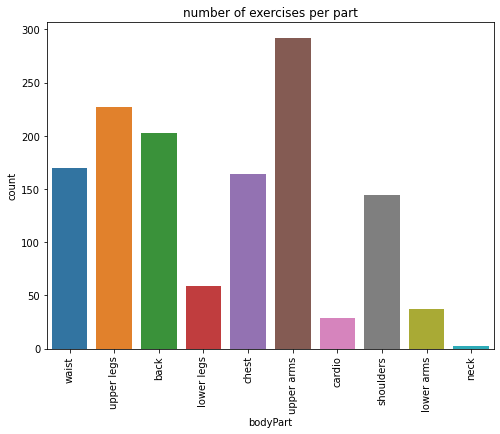

In [10]:
plt.figure(figsize=(8,6))

sns.countplot(data = exercise, x = "bodyPart")
plt.title('number of exercises per part')
plt.xticks(rotation='vertical')
plt.show()

### target(운동 상세 부위)

In [11]:
print(len(exercise["target"].unique()))
exercise["target"].unique()

19


array(['abs', 'quads', 'lats', 'calves', 'pectorals', 'glutes',
       'hamstrings', 'adductors', 'triceps', 'cardiovascular system',
       'spine', 'upper back', 'biceps', 'delts', 'forearms', 'traps',
       'serratus anterior', 'abductors', 'levator scapulae'], dtype=object)

In [12]:
exercise["target"].value_counts()

abs                      170
pectorals                159
biceps                   151
glutes                   144
delts                    144
triceps                  141
upper back                88
lats                      81
calves                    59
quads                     44
forearms                  37
cardiovascular system     29
hamstrings                28
spine                     19
traps                     15
adductors                  6
serratus anterior          5
abductors                  5
levator scapulae           2
Name: target, dtype: int64

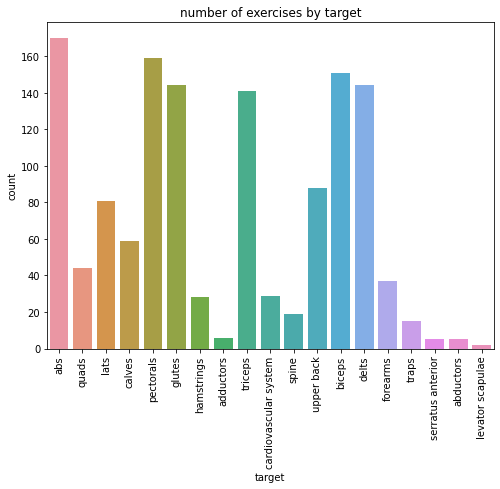

In [13]:
plt.figure(figsize=(8,6))

sns.countplot(data = exercise, x = "target")
plt.title('number of exercises by target')
plt.xticks(rotation='vertical')
plt.show()

### equipment(운동 기구)

In [14]:
print(len(exercise["equipment"].unique()))
exercise["equipment"].unique()

28


array(['body weight', 'cable', 'leverage machine', 'assisted',
       'medicine ball', 'stability ball', 'band', 'barbell', 'rope',
       'dumbbell', 'ez barbell', 'sled machine', 'upper body ergometer',
       'kettlebell', 'olympic barbell', 'weighted', 'bosu ball',
       'resistance band', 'roller', 'skierg machine', 'hammer',
       'smith machine', 'wheel roller', 'stationary bike', 'tire',
       'trap bar', 'elliptical machine', 'stepmill machine'], dtype=object)

In [15]:
exercise["equipment"].value_counts()

body weight             325
dumbbell                294
cable                   157
barbell                 154
leverage machine         84
band                     54
smith machine            48
kettlebell               41
weighted                 36
stability ball           28
ez barbell               23
sled machine             15
assisted                 15
medicine ball            13
rope                     10
roller                    8
resistance band           7
bosu ball                 3
wheel roller              2
olympic barbell           2
hammer                    1
skierg machine            1
upper body ergometer      1
stationary bike           1
tire                      1
trap bar                  1
elliptical machine        1
stepmill machine          1
Name: equipment, dtype: int64

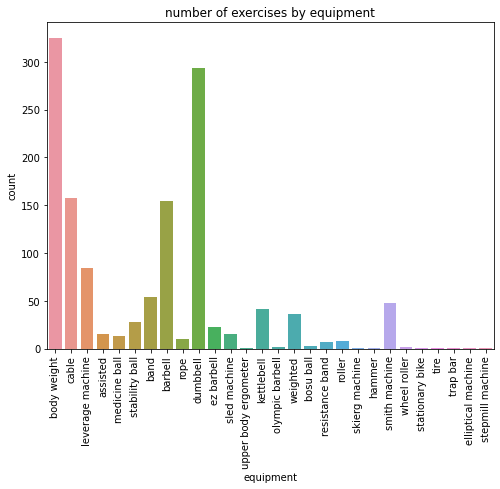

In [16]:
plt.figure(figsize=(8,6))

sns.countplot(data = exercise, x = "equipment")
plt.title('number of exercises by equipment')
plt.xticks(rotation='vertical')
plt.show()

---> 운동기구를 사야 한다면 어떤 것이 최우선일까?에 사용할 수 있음

### name(운동 이름)
데이터셋 크기와 동일할 것으로 예상되는 데이터

In [17]:
print(len(exercise["name"].unique()))
# 왜 데이터셋 크기인 1327개가 아닐까?

1322


## 4. 중복데이터 처리하기

In [18]:
exercise["name"].value_counts()[:10]
# 5개의 값이 중복되는 것을 확인할 수 있다

self assisted inverse leg curl                      2
smith reverse calf raises                           2
ez barbell spider curl                              2
barbell seated calf raise                           2
push-up (on stability ball)                         2
3/4 sit-up                                          1
kettlebell figure 8                                 1
kettlebell extended range one arm press on floor    1
kettlebell double windmill                          1
kettlebell double snatch                            1
Name: name, dtype: int64

In [19]:
exercise[exercise["name"] == "self assisted inverse leg curl"]

,bodyPart,equipment,gifUrl,id,name,target
1127,upper legs,body weight,http://d205bpvrqc9yn1.cloudfront.net/0697.gif,697,self assisted inverse leg curl,hamstrings
1128,upper legs,body weight,http://d205bpvrqc9yn1.cloudfront.net/1766.gif,1766,self assisted inverse leg curl,hamstrings


In [20]:
exercise[exercise["name"] == "smith reverse calf raises"]

,bodyPart,equipment,gifUrl,id,name,target
1200,lower legs,smith machine,http://d205bpvrqc9yn1.cloudfront.net/0763.gif,763,smith reverse calf raises,calves
1201,lower legs,smith machine,http://d205bpvrqc9yn1.cloudfront.net/1394.gif,1394,smith reverse calf raises,calves


In [21]:
exercise[exercise["name"] == "ez barbell spider curl"]

,bodyPart,equipment,gifUrl,id,name,target
790,upper arms,ez barbell,http://d205bpvrqc9yn1.cloudfront.net/0454.gif,454,ez barbell spider curl,biceps
791,upper arms,ez barbell,http://d205bpvrqc9yn1.cloudfront.net/1628.gif,1628,ez barbell spider curl,biceps


In [22]:
exercise[exercise["name"] == "barbell seated calf raise"]

,bodyPart,equipment,gifUrl,id,name,target
185,lower legs,barbell,http://d205bpvrqc9yn1.cloudfront.net/0088.gif,88,barbell seated calf raise,calves
186,lower legs,barbell,http://d205bpvrqc9yn1.cloudfront.net/1371.gif,1371,barbell seated calf raise,calves


In [23]:
exercise[exercise["name"] == "push-up (on stability ball)"]

,bodyPart,equipment,gifUrl,id,name,target
1068,chest,stability ball,http://d205bpvrqc9yn1.cloudfront.net/0655.gif,655,push-up (on stability ball),pectorals
1069,chest,stability ball,http://d205bpvrqc9yn1.cloudfront.net/0656.gif,656,push-up (on stability ball),pectorals


--->
bodyPart, equipment, target은 같으나  gifUrl이 다름  
같은 도구로 사용법이 다른 경우인데, 낮은 id만 남겨놓고 중복을 삭제해도 무관해보임

In [24]:
# name이 같은 경우 삭제
exercise = exercise.drop_duplicates(['name'])

In [25]:
# 삭제 확인
len(exercise)

1322

In [26]:
# 삭제 확인
exercise[exercise["name"] == "self assisted inverse leg curl"]

,bodyPart,equipment,gifUrl,id,name,target
1127,upper legs,body weight,http://d205bpvrqc9yn1.cloudfront.net/0697.gif,697,self assisted inverse leg curl,hamstrings


In [27]:
# csv파일로 저장하기
exercise.to_csv("fitness_deleted.csv", mode='w')

## 4. 컬럼별 데이터 확인하기

In [28]:
# 부위별 상세 부위가 몇개씩 있는지 확인
exercise.groupby("bodyPart")["target"].value_counts()

bodyPart    target               
back        upper back                88
            lats                      81
            spine                     19
            traps                     15
cardio      cardiovascular system     29
chest       pectorals                158
            serratus anterior          5
lower arms  forearms                  37
lower legs  calves                    57
neck        levator scapulae           2
shoulders   delts                    144
upper arms  biceps                   150
            triceps                  141
upper legs  glutes                   144
            quads                     44
            hamstrings                27
            adductors                  6
            abductors                  5
waist       abs                      170
Name: target, dtype: int64

## 5. 원하는 운동 추출


In [29]:
# 만약 dumbbell을 이용해 back을 키우고 싶다면?
exercise[(exercise["bodyPart"] == "back") & (exercise["equipment"] == "dumbbell")]

,bodyPart,equipment,gifUrl,id,name,target
476,back,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/0293.gif,293,dumbbell bent over row,upper back
501,back,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/0305.gif,305,dumbbell decline shrug,traps
502,back,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/0304.gif,304,dumbbell decline shrug v. 2,traps
541,back,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/0327.gif,327,dumbbell incline row,upper back
543,back,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/0329.gif,329,dumbbell incline shrug,traps
548,back,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/3541.gif,3541,dumbbell incline y-raise,upper back
573,back,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/1328.gif,1328,dumbbell lying rear delt row,upper back
584,back,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/0292.gif,292,dumbbell one arm bent-over row,upper back
624,back,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/1329.gif,1329,dumbbell palm rotational bent over row,upper back
648,back,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/1330.gif,1330,dumbbell reverse grip incline bench one arm row,upper back


In [30]:
# 만약 dumbbell을 이용해 upper arm 중에서도 biceps 을 키우고 싶다면?
exercise[(exercise["bodyPart"] == "upper arms") & (exercise["equipment"] == "dumbbell") & (exercise["target"] == "biceps")]

,bodyPart,equipment,gifUrl,id,name,target
462,upper arms,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/0285.gif,285,dumbbell alternate biceps curl,biceps
463,upper arms,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/2403.gif,2403,dumbbell alternate biceps curl (with arm blaster),biceps
464,upper arms,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/1646.gif,1646,dumbbell alternate hammer preacher curl,biceps
465,upper arms,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/1647.gif,1647,dumbbell alternate preacher curl,biceps
466,upper arms,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/1648.gif,1648,dumbbell alternate seated hammer curl,biceps
...,...,...,...,...,...,...
725,upper arms,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/2293.gif,2293,dumbbell standing zottman preacher curl,biceps
726,upper arms,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/1684.gif,1684,dumbbell step up single leg balance with bicep...,biceps
741,upper arms,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/5201.gif,5201,dumbbell waiter biceps curl,biceps
743,upper arms,dumbbell,http://d205bpvrqc9yn1.cloudfront.net/0439.gif,439,dumbbell zottman curl,biceps


## 6. 홈트레이닝을 한다면 어떤 운동 기구를 사는게 가장 효율적일까?

### 운동 기구별 할 수 있는 운동 개수

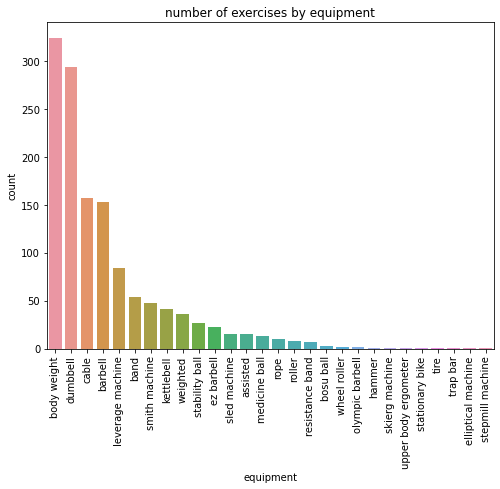

In [31]:
plt.figure(figsize=(8,6))

sns.countplot(data = exercise, x = "equipment", order = exercise['equipment'].value_counts().index)
plt.title('number of exercises by equipment')
plt.xticks(rotation='vertical')
plt.show()

-> body weight(맨몸 운동) > dumbbell > cable > barbell > leverage maching

### 가격 대비 효율적인 도구는?
(body weight를 제외한 상위 10개 비교)

In [32]:
# 상위 10개 값 추출(body weight 제외)
exercise_equipment = exercise["equipment"].value_counts()[1: 11]
exercise_equipment

dumbbell            294
cable               157
barbell             153
leverage machine     84
band                 54
smith machine        47
kettlebell           41
weighted             36
stability ball       27
ez barbell           22
Name: equipment, dtype: int64

In [33]:
# dumbell(8kg), cable-렛풀다운, barbell, leverage machine, band, smith machine, kettlebell(12kg), weighted, stability ball, ez barbell
# 다나와에서 키워드 검색 -> 인기상품순 -> 1위 상품 기준
price = [17410, 426320,  99930, 914400, 8770, 932620,  17060, 4020, 16900, 199940]

In [34]:
# 시리즈를 데이터프레임으로 변경
equipment_df = pd.Series.to_frame(exercise_equipment, name ="count")
equipment_df

,count
dumbbell,294
cable,157
barbell,153
leverage machine,84
band,54
smith machine,47
kettlebell,41
weighted,36
stability ball,27
ez barbell,22


In [35]:
# price와 count per price 컬럼 추가
equipment_df["price"] = price
equipment_df["count per price"] = equipment_df["count"] / equipment_df["price"]
equipment_df.sort_values(by="count per price", ascending = False, inplace=True)
equipment_df

,count,price,count per price
dumbbell,294,17410,0.016887
weighted,36,4020,0.008955
band,54,8770,0.006157
kettlebell,41,17060,0.002403
stability ball,27,16900,0.001598
barbell,153,99930,0.001531
cable,157,426320,0.000368
ez barbell,22,199940,0.000110
leverage machine,84,914400,0.000092
smith machine,47,932620,0.000050


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


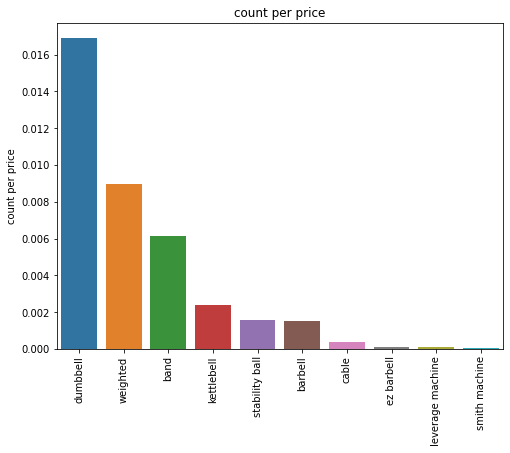

In [36]:
plt.figure(figsize=(8,6))

sns.barplot(equipment_df.index, equipment_df["count per price"])
plt.title('count per price')
plt.xticks(rotation='vertical')
plt.show()

-> dumbbell > cable > ez barbell > leverage machine > stability ball 순으로 효율적으로 나타남

### 아쉬운 점
- 운동 기구 가격이 다양하여 가격 기준을 잡기가 어렵다
- 운동 하나하나의 칼로리 소모량과 퀄리티는 따지기 어렵다
- 운동 기구가 차지하는 면적도 따지면 좋을 거 같다